## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [8]:
from keras.regularizers import l1, l2, l1_l2
def build_mlp(input_shape, regularizer, reg_ratio, output_units=10, num_neurons=[512, 256]):
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=regularizer(reg_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=regularizer(reg_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [9]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
ratios = [1e-4, 1e-8]
regularizers = [l1, l1_l2]

In [11]:
results = {}
for reg in regularizers:
    for ratio in ratios:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with Regulizer %s = %.6f" % (reg.__name__,ratio))
        model = build_mlp(input_shape=x_train.shape[1:], regularizer=reg, reg_ratio=ratio)
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "exp-%s-%s" % (reg.__name__,str(ratio))
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Experiment with Regulizer l1 = 0.000100
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
output (Dense)               (None, 10)                2570      
Total params: 1,707,274
Trainable params: 1,707,274
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 10s 200us/step - loss: 5.7714 - acc: 0.2905 - val_loss: 5.5953 - val_acc: 0.3524
Epoch 2/50
50000/50000 [===========

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 10s 201us/step - loss: 1.9859 - acc: 0.2972 - val_loss: 1.8445 - val_acc: 0.3535
Epoch 2/50
50000/50000 [==============================] - 9s 187us/step - loss: 1.7941 - acc: 0.3739 - val_loss: 1.7505 - val_acc: 0.3946
Epoch 3/50
50000/50000 [==============================] - 10s 208us/step - loss: 1.7213 - acc: 0.4014 - val_loss: 1.6967 - val_acc: 0.4053
Epoch 4/50
50000/50000 [==============================] - 11s 216us/step - loss: 1.6698 - acc: 0.4187 - val_loss: 1.6556 - val_acc: 0.4198
Epoch 5/50
50000/50000 [==============================] - 11s 219us/step - loss: 1.6289 - acc: 0.4333 - val_loss: 1.6145 - val_acc: 0.4322
Epoch 6/50
50000/50000 [==============================] - 10s 192us/step - loss: 1.5935 - acc: 0.4457 - val_loss: 1.5910 - val_acc: 0.4407
Epoch 7/50
50000/50000 [==============================] - 9s 184us/step - loss: 1.5635 - acc: 0.4561 - val_loss: 1.57

50000/50000 [==============================] - 12s 234us/step - loss: 14.5674 - acc: 0.3692 - val_loss: 13.5260 - val_acc: 0.3786
Epoch 3/50
50000/50000 [==============================] - 11s 215us/step - loss: 12.6084 - acc: 0.3895 - val_loss: 11.7265 - val_acc: 0.4005
Epoch 4/50
50000/50000 [==============================] - 12s 231us/step - loss: 10.9499 - acc: 0.4014 - val_loss: 10.2011 - val_acc: 0.4081
Epoch 5/50
50000/50000 [==============================] - 11s 227us/step - loss: 9.5410 - acc: 0.4101 - val_loss: 8.9025 - val_acc: 0.4145
Epoch 6/50
50000/50000 [==============================] - 11s 221us/step - loss: 8.3385 - acc: 0.4197 - val_loss: 7.7953 - val_acc: 0.4234
Epoch 7/50
50000/50000 [==============================] - 11s 213us/step - loss: 7.3157 - acc: 0.4241 - val_loss: 6.8552 - val_acc: 0.4226
Epoch 8/50
50000/50000 [==============================] - 11s 211us/step - loss: 6.4441 - acc: 0.4289 - val_loss: 6.0518 - val_acc: 0.4289
Epoch 9/50
50000/50000 [========

50000/50000 [==============================] - 19s 382us/step - loss: 10.1533 - acc: 0.3922 - val_loss: 9.4904 - val_acc: 0.3976
Epoch 4/50
50000/50000 [==============================] - 20s 410us/step - loss: 8.9053 - acc: 0.4066 - val_loss: 8.3418 - val_acc: 0.4153
Epoch 5/50
50000/50000 [==============================] - 20s 408us/step - loss: 7.8437 - acc: 0.4167 - val_loss: 7.3675 - val_acc: 0.4146
Epoch 6/50
50000/50000 [==============================] - 20s 392us/step - loss: 6.9407 - acc: 0.4244 - val_loss: 6.5391 - val_acc: 0.4188
Epoch 7/50
50000/50000 [==============================] - 19s 383us/step - loss: 6.1699 - acc: 0.4313 - val_loss: 5.8305 - val_acc: 0.4259
Epoch 8/50
50000/50000 [==============================] - 19s 372us/step - loss: 5.5098 - acc: 0.4401 - val_loss: 5.2220 - val_acc: 0.4354
Epoch 9/50
50000/50000 [==============================] - 19s 375us/step - loss: 4.9493 - acc: 0.4439 - val_loss: 4.7001 - val_acc: 0.4448
Epoch 10/50
50000/50000 [============

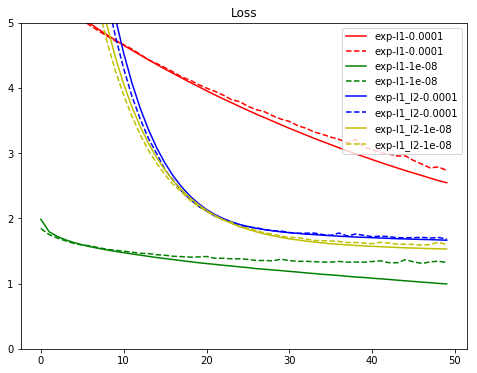

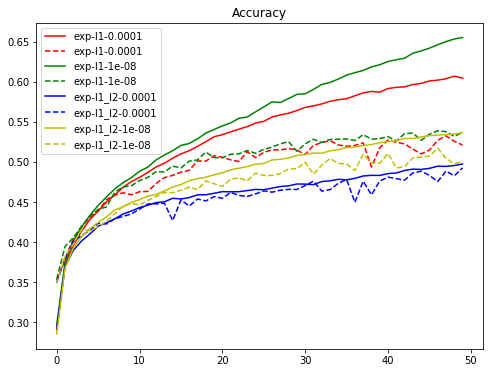

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()